## Sampling a univariate normal distribution via the ParaMonte library's ParaDRAM routine    

> For a more comprehensive discussion of different aspects and attributes of the sampler and how to run the simulation in parallel, see [the multivariate Normal distribution Jupyter Notebook example](sampling_multivariate_normal_density_function_via_paradram.ipynb) in the same folder as this Jupyter file exists.  

Suppose we want to sample random points from a [standard univariate Gaussian function](https://en.wikipedia.org/wiki/Normal_distribution). The following Python function `getLogFunc()` returns the natural logarithm of the Probability Density Function of the univariate standard Gaussian distribution.

In [2]:
# activate interative plotting in Jupyter environment
%matplotlib notebook

In [1]:
import numpy as np
logSqrt2Pi = np.log(np.sqrt(2*np.pi))
def getLogFunc(x): return -0.5*x**2 - logSqrt2Pi

> Since the mathematical objective functions (e.g., probability density functions) can take extremely small or large values, we often work with their natural logarithms of the objective functions instead of the objective function itself. This is the reason behind the naming convention used in the ParaMonte library for the user's objective functions: **getLogFunc**, indicating that the user must provide a function that returns the natural logarithm of the target objective function.  

We will sample random points from this objective function by calling the **ParaDRAM** sampler (**Delayed-Rejection Adaptive Metropolis-Hastings Markov Chain Monte Carlo sampler**) of the ParaMonte library.  

The simplest scenario would be to run the simulation with the default specifications that are appropriately determined by the ParaDRAM sampler.  
>**To run the sampler in parallel**, you will have to first save the MPI-enabled script as an external file. Visit the [ParaMonte library's documentation website](http://cdslab.org/paramonte/notes/run/python/) for more information.  

However, for further clarity of this particular example, we will specify an output folder for the automatically-named output files of the simulation.  

In [19]:
import paramonte as pm

# define a ParaMonte sampler instance
pmpd = pm.ParaDRAM()

# the forward-slash below indicates that the provided string should be treated 
# as the folder name and not as the prefix for the simulation output files.
pmpd.spec.outputFileName = "sampling_univariate_gaussian_density_function_via_paradram/"

# we will also request a much smaller number of uniquely-sampled points (5000)
# than the sampler's default value (100000).
pmpd.spec.chainSize = 5000

# initialize the random seed to generate reproducible results
pmpd.spec.randomSeed = 31951

# run the ParaDRAM sampler
pmpd.runSampler ( ndim = 1
                , getLogFunc = getLogFunc
                )


ParaDRAM - NOTE: Running the ParaDRAM sampler in serial mode...
ParaDRAM - NOTE: To run the ParaDRAM sampler in parallel mode visit: cdslab.org/pm
ParaDRAM - NOTE: If you are using Jupyter notebook, check the Jupyter's terminal window
ParaDRAM - NOTE: for realtime simulation progress and report.


ParaDRAM - NOTE: To read the generated output files sample or chain files, try the following:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.readSample()      # to read the final i.i.d. sample from the output sample file. 
ParaDRAM - NOTE:     pmpd.readChain()       # to read the uniquely-accepted points from the output chain file. 
ParaDRAM - NOTE:     pmpd.readMarkovChain() # to read the Markov Chain. NOT recommended for extremely-large chains.
ParaDRAM - NOTE: 
ParaDRAM - NOTE: Replace 'pmpd' with the name you are using for your ParaDRAM object.
ParaDRAM - NOTE: For more information and examples on the usage, visit:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     https://www.cdslab.org/paramonte/



This will print the realtime simulation progress information on your **Anaconda prompt window** (not inside your Jupyter notebook). Once the simulation is finished, the ParaDRAM routine generates 5 output files, each of which contains information about certain aspects of the simulation, [all available here to view](sampling_univariate_gaussian_density_function_via_paradram/).  

In [6]:
pmpd.readSample()


ParaDRAM - WARNING: delimiter is neither given as input nor set as a ParaDRAM object property.
ParaDRAM - WARNING: This information is essential for successful reading of the requested sample file(s).
ParaDRAM - WARNING: Proceeding with the default assumption of comma-delimited sample file contents...

ParaDRAM - NOTE: 1 files detected matching the pattern: "D:\Dropbox\Projects\20180101_ParaMonte\paramontex\jupyter\Python\sampling_univariate_gaussian_density_function_via_paradram\ParaDRAM_run_20200605_014456_763*_sample.txt"
ParaDRAM - NOTE: processing file: D:\Dropbox\Projects\20180101_ParaMonte\paramontex\jupyter\Python\sampling_univariate_gaussian_density_function_via_paradram\ParaDRAM_run_20200605_014456_763_process_1_sample.txt
ParaDRAM - NOTE: reading file contents... done in 0.012033 seconds.
ParaDRAM - NOTE: parsing file contents... done in 0.001011 seconds.
ParaDRAM - NOTE: computing sample correlation matrix... done in 0.004004 seconds.
ParaDRAM - NOTE: computing sample cova

To quickly visualize the generated sample as a histogram, try,

<IPython.core.display.Javascript object>


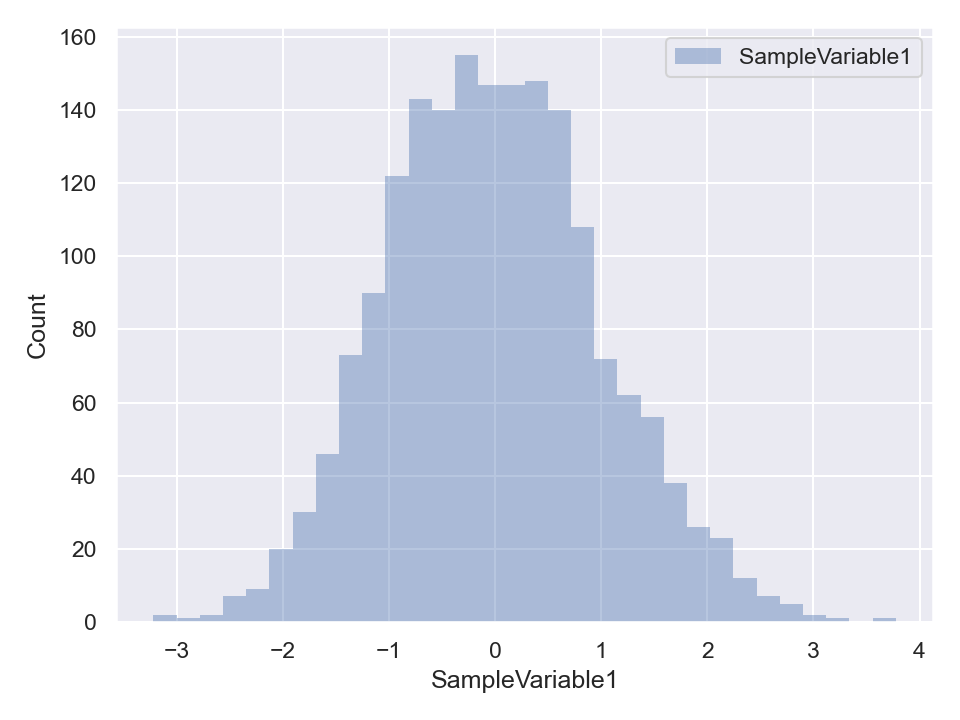

In [7]:
pmpd.sampleList[0].plot.hist()

If the variable names are specified for the sampler before running the simulations, the sampler will automatically assign names to each variable. To change the x-label, for example, you can try,

<IPython.core.display.Javascript object>


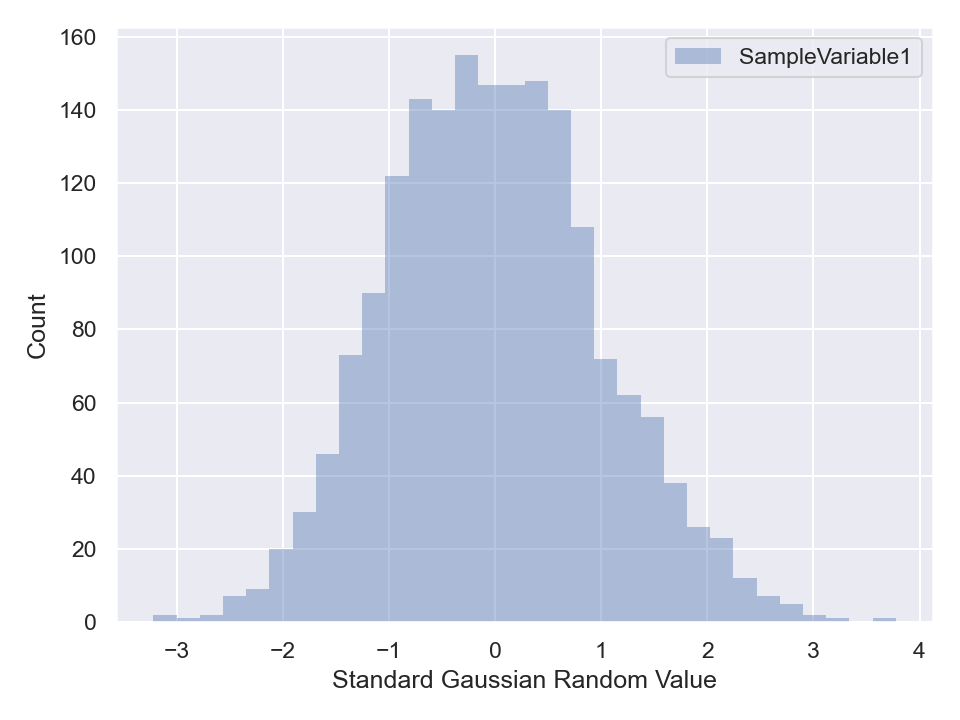

Text(0.5, 31.07499999999998, 'Standard Gaussian Random Value')

In [8]:
pmpd.sampleList[0].plot.hist()
pmpd.sampleList[0].plot.hist.currentFig.axes.set_xlabel("Standard Gaussian Random Value")

To make a trace-plot of the sample, try,  

<IPython.core.display.Javascript object>


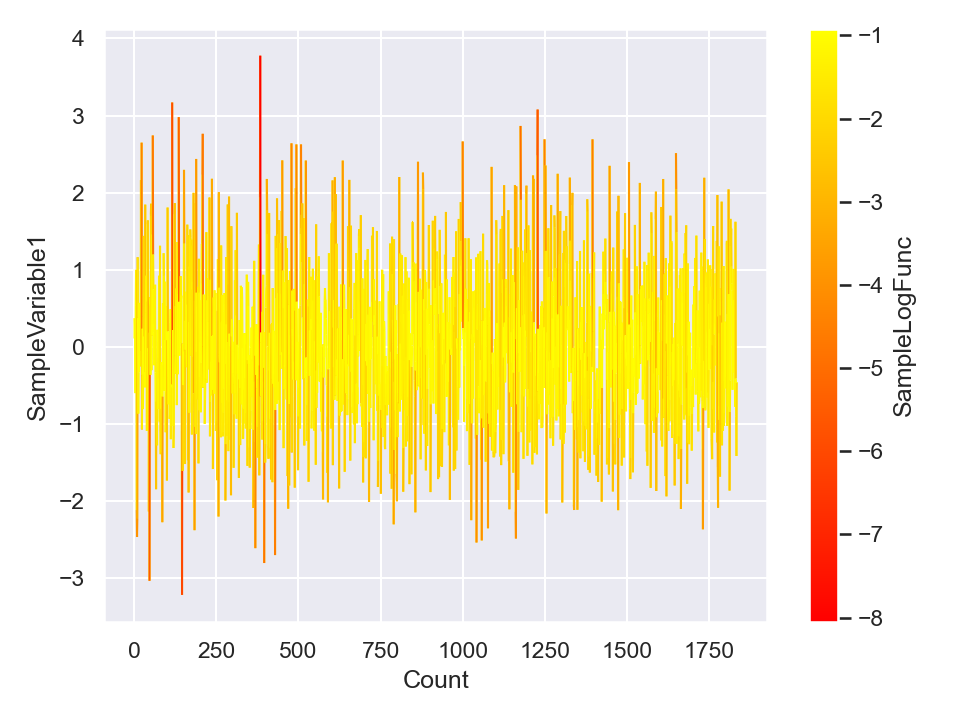

In [9]:
pmpd.sampleList[0].plot.line()

To change the scale of the x-axis, try,  

<IPython.core.display.Javascript object>


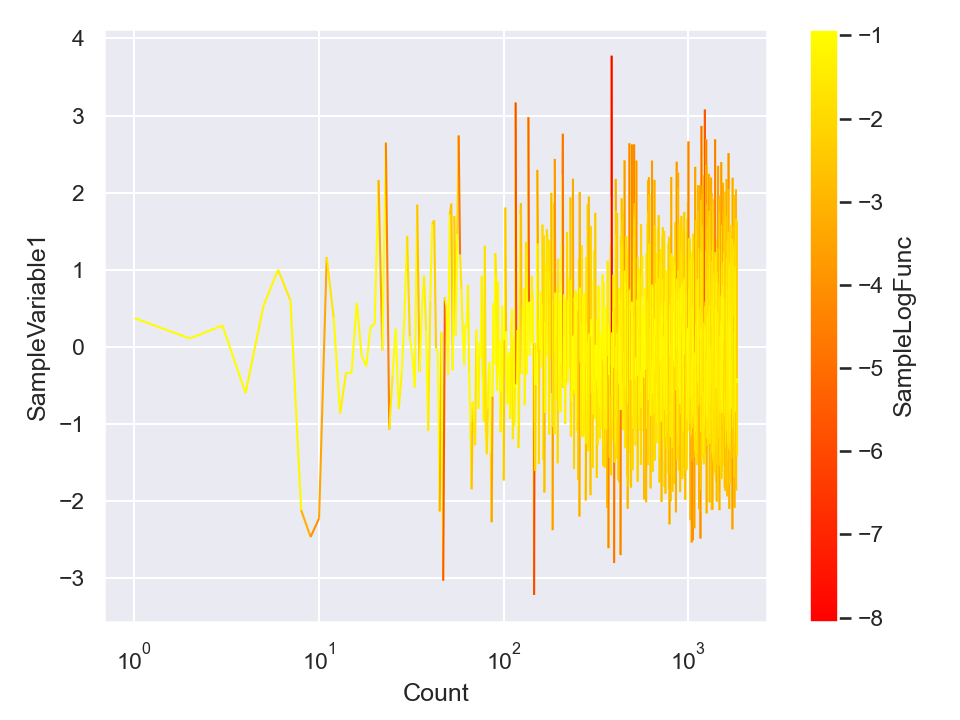

In [10]:
pmpd.sampleList[0].plot.line()
pmpd.sampleList[0].plot.line.currentFig.axes.set_xscale("log")

By default, the color of the line in the trace-plot will represent the value returned by `getLogFunc()` at the given sampled point. To turn the color off, you can instead try,

In [11]:
pmpd.sampleList[0].plot.line.ccolumns

'SampleLogFunc'

<IPython.core.display.Javascript object>


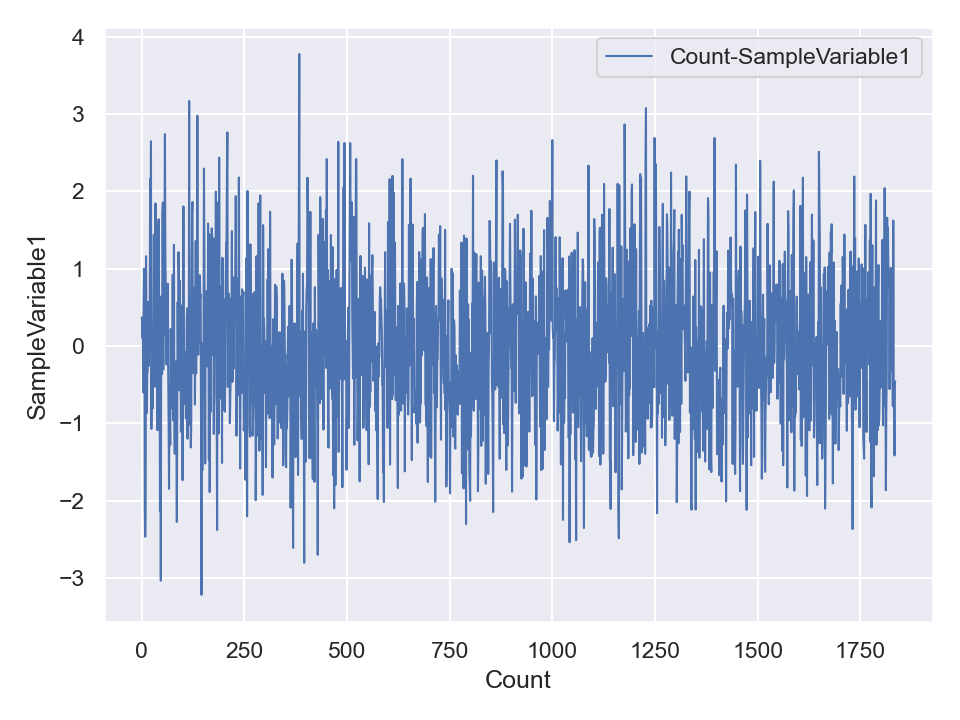

In [12]:
pmpd.sampleList[0].plot.line.ccolumns = None
pmpd.sampleList[0].plot.line()

There are many other properties of the plot that can be set or modified via the attributes of the `pmpd.sampleList[0].plot.line` object. To see them all, see the documentation of the object,

In [13]:
help(pmpd.sampleList[0].plot.line)

Help on LinePlot in module _LinePlot object:

class LinePlot(builtins.object)
 |  LinePlot(dataFrame: Union[pandas.core.frame.DataFrame, NoneType] = None, xcolumns: Union[str, range, List[int], List[str], NoneType] = None, ycolumns: Union[str, range, List[int], List[str], NoneType] = None, ccolumns: Union[str, range, List[int], List[str], NoneType] = (), rows: Union[range, List[int], NoneType] = None, lc_kws: Union[Dict, NoneType] = (), set_kws: Union[Dict, NoneType] = (), plot_kws: Union[Dict, NoneType] = (), figure_kws: Union[Dict, NoneType] = (), legend_kws: Union[Dict, NoneType] = (), colorbar_kws: Union[Dict, NoneType] = (), outputFile: Union[str, NoneType] = None)
 |  
 |  .. py:class:: LinePlot
 |  
 |  This is the LinePlot class for generating instances
 |  of line figures based on matplotlib library's
 |  ``line()`` and functions.
 |  
 |      **Usage**
 |  
 |          First generate an object of this class by optionally
 |          passing the following parameters described 

To make a scatter plot of the sampled points, try,

<IPython.core.display.Javascript object>


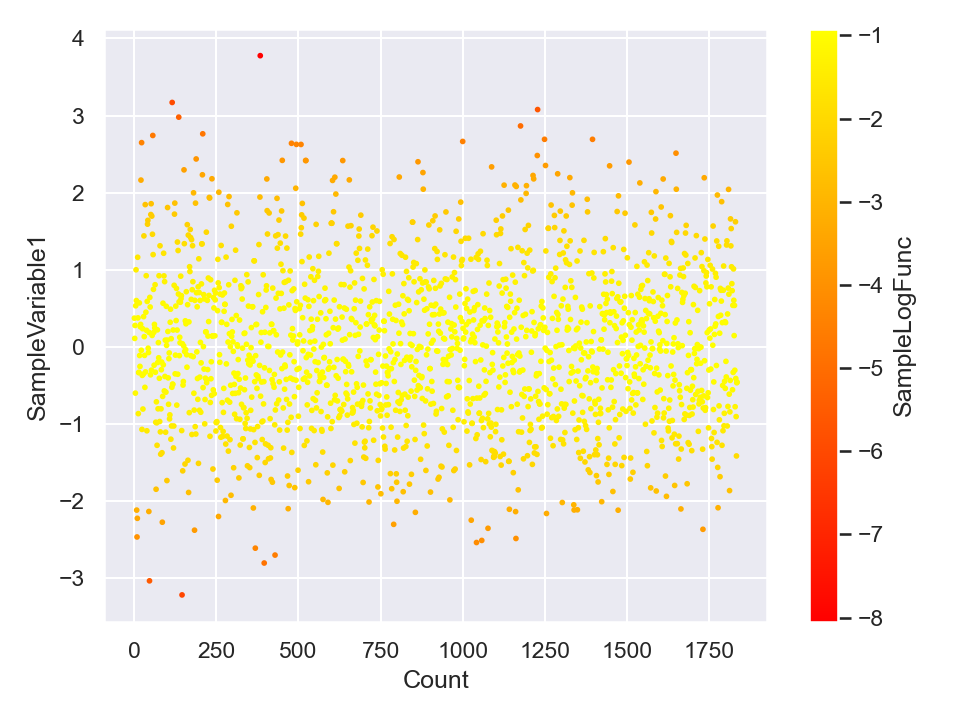

In [14]:
pmpd.sampleList[0].plot.scatter()

Setting or modifying the properties of the scatter plot are identical to the line plot.

To make kernel density plots of the sampled points, try (**WARNING**: 2D-kernel density estimates are computationally demanding and depending on the capabilities of your computer may take a long while to finish),

<IPython.core.display.Javascript object>


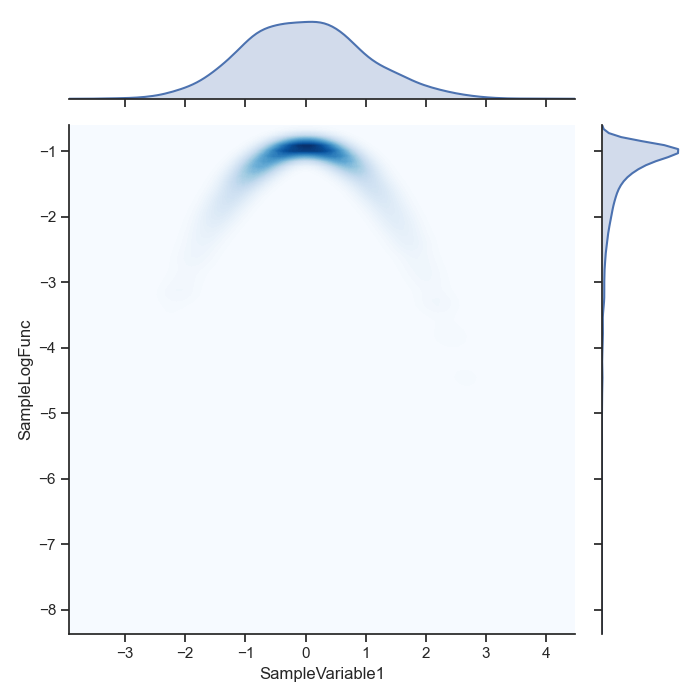

In [15]:
pmpd.sampleList[0].plot.density()

Since there is no more than one sampled variable here, the kernel density plot displays `logFunc` vs. `SampleVariable1`.

To compute and visualize the autocorrelation of the sampled points, try,  

<IPython.core.display.Javascript object>


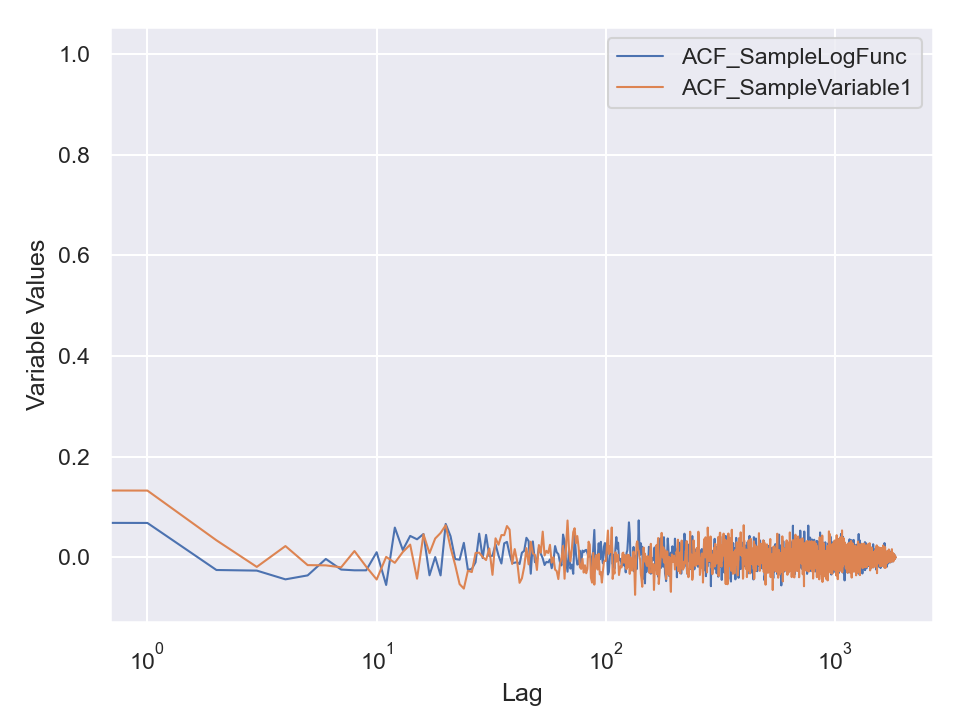

In [16]:
pmpd.sampleList[0].stats.acf()
pmpd.sampleList[0].stats.acf.plot.line()
pmpd.sampleList[0].stats.acf.plot.line.currentFig.axes.set_xscale("log")

The above AutoCorrelation plot is reassuring since the sampled points do not appear to be correlated with each other at all. This is because the ParaDRAM routine, by default, applies as many rounds of Markov chain refinement as necessary to remove any residual correlations from the final output random sample.

To get the statistics of the maximum of the function, try,

In [18]:
print( "maxLogFunc: {}".format(pmpd.sampleList[0].stats.maxLogFunc.value) )
print( "The location of maxLogFunc: {}".format(pmpd.sampleList[0].stats.maxLogFunc.state.values) )

maxLogFunc: -0.91893918
The location of maxLogFunc: [0.00113841]


which is again reassuring since we already know that the maximum of the standard Gaussian distribution happens at zero, which is very close to the ParaDRAM sampler's estimated location of maxLogFunc in the above.

>**There are many more functionalities and features of the ParaMonte library that were neither explored nor mentioned in this simple Jupyter notebook example. You can explore them by checking the existing components of each attribute of the ParaDRAM sampler class and by visiting the [ParaMonte library's documentation website](http://cdslab.org/paramonte/)**.